## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

Import the libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

### a. Read in the dataset and take a look at the top few rows here:

In [24]:
# load the dataset 
df = pd.read_csv('ab_data.csv')
# print first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### b. Use the cell below to find the number of rows in the dataset.

In [25]:
# show number of rows by using shape method
df.shape

(294478, 5)

### c. The number of unique users in the dataset.

In [27]:
df.user_id.nunique()

290584

### d. The proportion of users converted.

In [28]:
df['converted'].mean()

0.11965919355605512

### e. The number of times the `new_page` and `treatment` don't match.

In [29]:
df.query("(group == 'treatment' and landing_page != 'new_page')or(group != 'treatment' and landing_page == 'new_page')").shape


(3893, 5)

### f. Do any of the rows have missing values?

In [97]:
# display summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
 5   intercept     294478 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 13.5+ MB


In [98]:
# sum the null values in each columns
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
intercept       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

### a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [101]:
# create a new dataframe that contains both group and landing_page 
df2 = data.query("(group == 'treatment' and landing_page == 'new_page')or(group =='control' and landing_page == 'old_page')")
# print first 5 rows
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [33]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

### a. How many unique **user_id**s are in **df2**?

In [34]:
df2.user_id.nunique()

290584

### b. There is one **user_id** repeated in **df2**.  What is it?

In [37]:
# show duplicated rows

df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### c. What is the row information for the repeat **user_id**? 

In [38]:
# display the rows with 773192 id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [102]:
# drop one of the rows 
df2.drop(2893, inplace=True)
df2[df2['user_id'] == 773192]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

### a. What is the probability of an individual converting regardless of the page they receive?

In [40]:
df2.converted.mean()

0.11959708724499628

### b. Given that an individual was in the `control` group, what is the probability they converted?

In [41]:
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

### c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [42]:
df2[df2['group'] == 'treatment'].converted.mean()

0.11880806551510564

### d. What is the probability that an individual received the new page?

In [45]:
df2[df2['landing_page'] == 'new_page'].count()/len(df2)

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

#### e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The results of the two parts were too close, for this reason, it is not sufficient evidence to conclude. We must find another way and different factors to make the right decision.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Hypothesis Test:
<ul>
    <li>H0: Pold >= Pnew </li>
    <li>H1: Pold < Pnew </li>
</ul>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

### a. What is the **conversion rate** for $p_{new}$ under the null? 

In [47]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

### b. What is the **conversion rate** for $p_{old}$ under the null? 

In [48]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

### c. What is $n_{new}$, the number of individuals in the treatment group?

In [49]:
n_new = df2[df2['group'] == 'treatment'].count()[0]
n_new

145310

### d. What is $n_{old}$, the number of individuals in the control group?

In [50]:
n_old = df2[df2['group'] == 'control'].count()[0]
n_old

145274

### e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [51]:
new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1-p_new)])
len(new_page_converted)

145310

### f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [52]:
old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1-p_old)])
len(old_page_converted)

145274

### g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [58]:
new_page_converted.mean() - old_page_converted.mean()

-0.0006490048581279939

### h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [59]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1-p_new)])
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1-p_old)])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

### i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

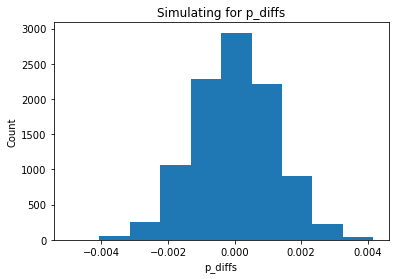

In [103]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Count')
plt.title("Simulating for p_diffs");

### j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [61]:
actual_diff = df2[df2['group'] == 'treatment'].converted.mean() - df2[df2['group'] == 'control'].converted.mean()
actual_diff

-0.0015782389853555567

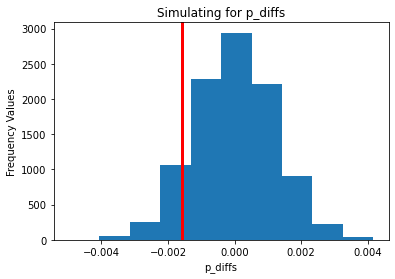

In [104]:
plt.hist(p_diffs)
plt.axvline(actual_diff, color = 'r', linewidth = 3)
plt.xlabel('p_diffs')
plt.ylabel('Frequency Values')
plt.title("Simulating for p_diffs");

In [63]:
p_diffs = np.array(p_diffs)
(actual_diff < p_diffs).mean()

0.9056

### k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In the previous part, we tried to observe the number of visitors on both pages. To do so, We calculated the p_value and we tried to test the H0 by checking if the value meets one of the two conditions P_value < 0.05 or P_value > 0.95. 
In this part we faild to reject the null hypothesis.


### l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [64]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page'].converted.sum()
convert_new = df2[df2['landing_page'] == 'new_page'].converted.sum()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

### m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [68]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

### n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In the previous steps, we used the z_score test to check the results. The value doesn't meet the condition that states the P_value > 0.95. For this reason, we will accept the null hypothesis and reject the alternative hypothesis. In addition, the findings here agree with the findings in part j & k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

### a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

### b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [69]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [129]:
df2['intercept'] = 1

#Create dummy variable 
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,country,intercept,CA,US,UK,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US,1,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US,1,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US,1,0,1,0,0


### c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [130]:
lr =sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


### d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [131]:
result = lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        04:32:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

### e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page represents 0.190, the findings differ from the value in part 2, because in the Logistic Regression model we used two-sided test and we added other addtional factors such as the intercept instead of using one-sided test.  

### f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Using more factors in the Regression model will help us to have more accurate results, which will help in decision-making. This is because we must take into consideration the other factors that affect user choice. However, there may be some disadvantages of adding more factors such as we may have inaccurate results if the correlation is wrong.

### g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [139]:
countries = pd.read_csv('./countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [140]:
# joining the two datasets
df2 = df2.join(countries.set_index('user_id'),on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,CA,US,UK,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,0,US


In [141]:
# count the number of each country
df2['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [142]:
# Creating 2 new country columns for the dummy variables.
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.drop('UK', axis = 1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,CA,US,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [145]:
#adding dummy variables 
df2[['US', 'CA']] = pd.get_dummies(df2['country'])[['US', "CA"]]
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,CA,US,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


From the results, it is clear that the country doesn't have an impact on the conversion and it can't explain the customers' decision.


### h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [146]:
df2['US_ab_page'] = df2['US'] * df2['ab_page']
df2['CA_ab_page'] = df2['CA'] * df2['ab_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,CA,US,ab_page,country,US_ab_page,CA_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0


In [151]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'US', 'CA', 'US_ab_page', 'CA_ab_page']])
logit
result = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [152]:
# display a summary 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Dec 2020   Pseudo R-squ.:                 -0.2214
Time:                        04:57:07   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

Summary: 
Based on the results, there is no interaction between page and country. Also, the findings couldn't prove that the new page gains better results compared to the old one.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])